# Task 1: Iris Flower Classification
## Using Random Forest

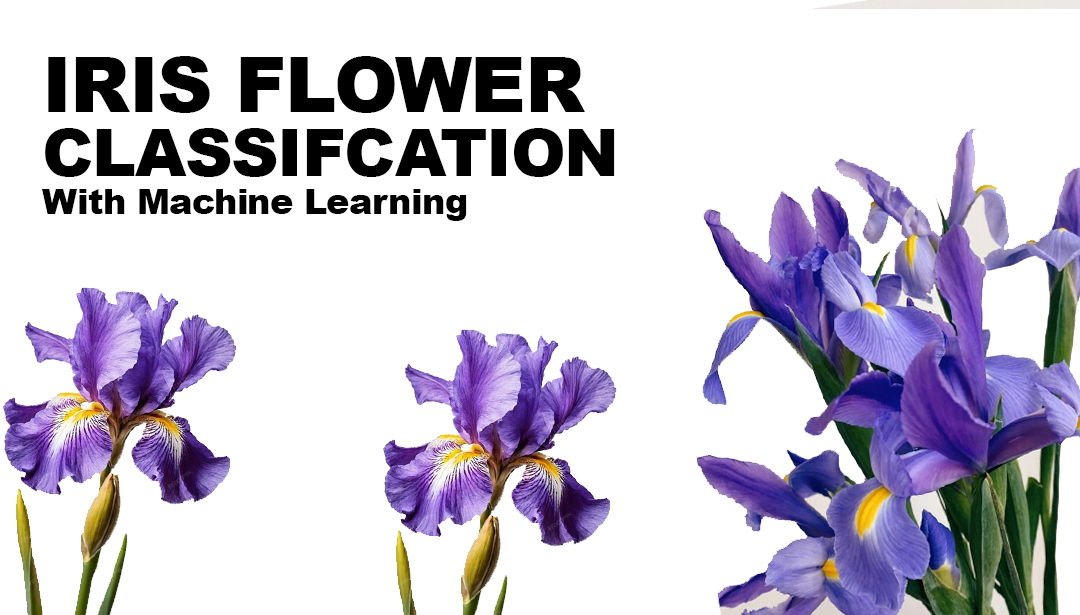

## Problem Statement
    - Iris flower has three species: Setosa, Versicolor, and virginica, which differs according to their measurements. 
      Now assume that you have the measurements of the Iris flowers according to their species. 
      Train a machine learning model that can learn from the measurements of the Iris species and classify them 

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np

In [2]:
# loading the data set
df = pd.read_csv(r'C:\Users\user\Desktop\GD\tutorials\Data Science\Oasis\Iris dataset\Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# making a copy of the data
df_copy = df.copy()
df_copy.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# checking of missing values
df_copy.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# checking data structure
df_copy.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
# checking of the unique values in specis column
df_copy['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df_copy['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#checking the dataset shape
df_copy.shape

(150, 6)

### Changing the Species names to numerical values using the mapping method

In [10]:
# changing the 'species' to numerical values using the 'map' method
df_copy.Species = df_copy.Species.map({'Iris-setosa' : 0,
                                       'Iris-versicolor' : 1,
                                       'Iris-virginica' : 2})

In [36]:
df_copy.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


### Spliting the data into 'X-Independent variable' and 'y-target variable' 

In [12]:
# spliiting the data into X and y variables
X = df_copy.iloc[:, 1:5]
y = df_copy.iloc[:, 5]

In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [14]:
# checking the shape
X.shape, y.shape

((150, 4), (150,))

### splitting the 'X' and 'y' virables into training and testing data set using train_test_split method

In [15]:
# importing the train_test_split for training and testing
from sklearn.model_selection import train_test_split

In [25]:
#creating variables for test & training data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 10)

### Applying Random Forest for our model training

In [26]:
# importing RnadFirestClassifier from 'ensemble'
from sklearn.ensemble import RandomForestClassifier

In [27]:
# creating a variable for model and fitting the data
rdf = RandomForestClassifier()
rdf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# #creating a variable for our test data prediction
y_pred = rdf.predict(X_test)
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1], dtype=int64)

In [29]:
# checking for the probability prediction
rdf.predict_proba(X_test)[:20]

array([[0.  , 0.96, 0.04],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.97, 0.03],
       [1.  , 0.  , 0.  ],
       [0.01, 0.92, 0.07],
       [0.  , 0.46, 0.54],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.98, 0.02],
       [0.  , 0.97, 0.03],
       [0.  , 0.05, 0.95],
       [0.  , 0.98, 0.02],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.02, 0.97, 0.01],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [30]:
#checking the model accuracy
rdf.score(X_test, y_test) * 100

97.77777777777777

### Introducing Metrics and Classification_report to check our model accuracy

In [31]:
#importing metrics and classification_report
from sklearn import metrics
from sklearn.metrics import classification_report

In [32]:
# checking the model accuracy
print('Model Test Accuracy = ', metrics.accuracy_score(y_test, y_pred) * 100)

Model Test Accuracy =  97.77777777777777


In [33]:
# checking the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

